In [1]:
import numpy as np
import pandas as pd
#import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
import gc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score, classification_report
from sklearn.linear_model import LogisticRegression

# Data reading

In [2]:
DATAPATH ="data/"
all_races = pd.read_csv(DATAPATH+"races_SailGP_21-09.csv")

In [4]:
all_races['DateTime'] = pd.to_datetime(all_races['DateTime'])

In [3]:
print(all_races.shape)
print(all_races.columns)
all_races.sample(5)

(75182, 71)
Index(['DateTime', 'LATITUDE', 'LONGITUDE', 'BOAT_SPEED', 'TWS', 'TWA', 'TWD',
       'HEADING', 'ANGLE_CA1', 'ANGLE_CA2', 'ANGLE_CA3', 'ANGLE_CA4',
       'LENGTH_RH_P', 'LENGTH_RH_S', 'LENGTH_RH_BOW', 'ANGLE_WING_TWIST',
       'PER_WING_TWIST', 'ANGLE_WING_ROT', 'AWA', 'AWS', 'QD_COG', 'COURSE',
       'PITCH', 'HEEL', 'LEEWAY', 'ANGLE_DB_RAKE_P', 'ANGLE_DB_RAKE_S',
       'ANG_RUD_AV', 'ANG_RUD_DIFF', 'ANGLE_RUD_RAKE_P', 'ANGLE_RUD_RAKE_S',
       'ANGLE_FLAP_1_TWIST', 'ANGLE_FLAP_2_TWIST', 'ANGLE_FLAP_3_TWIST',
       'PRES_ACC_GEN', 'PRES_ACC_RAKE', 'LENGTH_DB_H_P', 'LENGTH_DB_H_S',
       'OFFSET_MWA', 'MWA', 'MWS', 'OFFSET_WIND_WEIGHT', 'PER_JIB_LEAD',
       'ANGLE_CANT_P', 'ANGLE_CANT_S', 'M110_MODE_DB_DOWN', 'M110_MODE_DB_UP',
       'M110_MODE_SWAP', 'M110_MODE_UPWIND', 'M110_MODE_STOW',
       'M110_MODE_MANEUVER', 'WHEEL_MAP_SWITCH_P', 'WHEEL_MAP_SWITCH_S',
       'MD4_PER_INV_UW_SPD', 'MD4_PER_TWIST_PED_EASE', 'MD4_PER_INV_DW_SPD',
       'MD4_PER_CAMBER_EASE

DateTime   LATITUDE  LONGITUDE  BOAT_SPEED        TWS  \
57294  2019-09-21 12:04:31  43.302924   5.349904    0.222665  10.072660   
45328  2019-09-21 12:15:53  43.300470   5.354023    1.237373  10.766228   
53370  2019-09-21 11:01:54  43.360324   5.301889    0.243926   2.202232   
43219  2019-09-21 11:40:44  43.296966   5.348359    3.678007   9.231378   
14399  2019-09-21 11:37:45  43.302788   5.340092   28.870528  13.195062   

             TWA         TWD     HEADING  ANGLE_CA1  ANGLE_CA2  ...  \
57294  -7.781541  100.550738  109.359000  -2.000000     -1.450  ...   
45328 -25.495026   76.430779   90.239198   1.300000      1.675  ...   
53370 -12.922875  276.229658  289.033896  -2.270000     -1.205  ...   
43219  25.123046   89.504938   59.279600  19.570001     18.160  ...   
14399 -53.047630  100.457648  154.931604 -23.760000    -19.465  ...   

       MD4_PWM_JIB_SHT_EXT  MD4_PWM_JIB_CUN_EXT  MD4_PWM_JIB_CUN_RET  \
57294            55.000001            20.000000            28.000000   
45328            55.000001            30.000001            20.000000   
53370            55.000001            20.000000            28.000000   
43219            60.000002            30.000001            20.000000   
14399            50.000000            25.000000            30.000001   

       MD4_PWM_JIB_LEAD_EXT  MD4_PWM_JIB_LEAD_RET  PLT_GAIN_FAST_LIFT  \
57294             89.999998             20.000000                12.0   
45328            100.000000             85.000002                 1.0   
53370             89.999998             20.000000                12.0   
43219            100.000000             85.000002                 1.0   
14399             86.000001             10.000000                 5.0   

       PLT_GAIN_MN  PLT_GAIN_RUD_DIFF  PLT_GAIN_SL  country  
57294         12.0                6.0         11.0      gbr  
45328         12.0                6.0          9.0      jap  
53370         12.0                6.0         11.0      gbr  
43219         12.0                6.0          9.0      jap  
14399         11.0                5.0         11.0      usa  

[5 rows x 71 columns]

# EDA

In [8]:
cols_plot=["BOAT_SPEED", "COURSE"]
subset=all_races[cols_plot+["DateTime"]].set_index("DateTime")

In [18]:
print("Year of the dataset: ",subset.index.month.unique())
print("Month of the dataset: ",subset.index.month.unique())
print("Day of the dataset: ",subset.index.day.unique())
print("Hours of the dataset: ",subset.index.hour.unique())

Year of the dataset:  Int64Index([9], dtype='int64', name='DateTime')
Month of the dataset:  Int64Index([9], dtype='int64', name='DateTime')
Day of the dataset:  Int64Index([21], dtype='int64', name='DateTime')
Hours of the dataset:  Int64Index([9, 10, 11, 12, 13, 14], dtype='int64', name='DateTime')


In [22]:
subset.head()

BOAT_SPEED      COURSE
DateTime                                   
2019-09-21 09:36:19    0.964809  108.647228
2019-09-21 09:36:20    0.862895  109.911173
2019-09-21 09:36:21    1.016436  111.088029
2019-09-21 09:36:22    1.018360  112.186962
2019-09-21 09:36:23    1.033167  113.602168

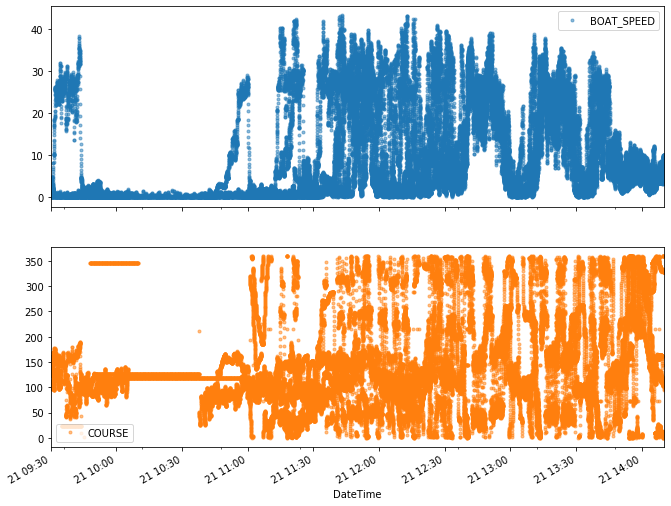

In [10]:
axes = subset[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

In [36]:
all_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75182 entries, 0 to 75181
Data columns (total 71 columns):
DateTime                  75182 non-null datetime64[ns]
LATITUDE                  74945 non-null float64
LONGITUDE                 74945 non-null float64
BOAT_SPEED                75000 non-null float64
TWS                       74985 non-null float64
TWA                       74985 non-null float64
TWD                       74985 non-null float64
HEADING                   75000 non-null float64
ANGLE_CA1                 74990 non-null float64
ANGLE_CA2                 74990 non-null float64
ANGLE_CA3                 74990 non-null float64
ANGLE_CA4                 74990 non-null float64
LENGTH_RH_P               75000 non-null float64
LENGTH_RH_S               75000 non-null float64
LENGTH_RH_BOW             75000 non-null float64
ANGLE_WING_TWIST          74803 non-null float64
PER_WING_TWIST            74797 non-null float64
ANGLE_WING_ROT            75000 non-null float64
AW

In [15]:
print(subset.index.month.unique())

Int64Index([9], dtype='int64', name='DateTime')